In [3]:
#Import Python Libraries
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context



* Find how many records this data frame has;
* How many elements are there?     
* What are the column names?
* What types of columns we have in this data frame?


In [18]:
df.shape[0]

78

In [15]:
df.size

468

In [16]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [17]:
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

* Give the summary for the numeric columns in the dataset
* Calculate standard deviation for all numeric columns;
* What are the mean values of the first 50 records in the dataset?   Hint: use head() method to subset the first 50 records and then calculate the mean


In [19]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [20]:
df.std()

/var/folders/h2/w8wtct716ds0mb49x7w284zm0000gp/T/ipykernel_9820/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


phd           12.498425
service       12.139768
salary     28293.661022
dtype: float64

In [21]:
df.head(50).mean()

/var/folders/h2/w8wtct716ds0mb49x7w284zm0000gp/T/ipykernel_9820/1648960742.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.head(50).mean()


phd            21.52
service        17.60
salary     113789.14
dtype: float64

* Calculate the basic statistics for the salary column;
* Find how many values in the salary column (use count method);
* Calculate the average salary;


In [22]:
df['salary'].describe()

count        78.000000
mean     108023.782051
std       28293.661022
min       57800.000000
25%       88612.500000
50%      104671.000000
75%      126774.750000
max      186960.000000
Name: salary, dtype: float64

In [23]:
df['salary'].count()

78

In [24]:
df['salary'].mean()

108023.78205128205

* Calculate the median salary of male and female faculty.
* Calculate the standard deviation of salary for each discipline.




In [25]:
df.groupby('sex')['salary'].median()

sex
Female    103750.0
Male      107300.0
Name: salary, dtype: float64

In [26]:
df.groupby('discipline')['salary'].std()

discipline
A    26000.183807
B    27805.722287
Name: salary, dtype: float64

* Count the number of full professors in the data set.
* Find assistant professors’ salaries from the data set.
* Select rows 20 to 30 from the data set that only includes associate professors. 




In [27]:
df['rank'].value_counts()

Prof         46
AsstProf     19
AssocProf    13
Name: rank, dtype: int64

In [28]:
df[df['rank']=='AsstProf']['salary']

12    88000
16    75044
17    92000
20    92000
22    73000
23    85000
28    91300
38    91000
42    80225
43    77000
46    74692
50    97032
53    73500
55    72500
57    72500
60    92000
66    63100
68    77500
70    78500
Name: salary, dtype: int64

In [33]:
df[df['rank']=='AssocProf'][4:10]

,rank,discipline,phd,service,sex,salary
47,AssocProf,B,11,11,Female,103613
54,AssocProf,A,25,22,Female,62884
56,AssocProf,A,10,8,Female,77500
59,AssocProf,B,12,10,Female,103994
61,AssocProf,B,13,10,Female,103750
62,AssocProf,B,14,7,Female,109650


* Sort the data set by the phd column in ascending order


In [34]:
df.sort_values(by='phd',ascending= True)

,rank,discipline,phd,service,sex,salary
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
60,AsstProf,B,3,3,Female,92000
...,...,...,...,...,...,...
3,Prof,A,40,31,Male,131205
27,Prof,A,45,43,Male,155865
36,Prof,B,45,45,Male,146856
9,Prof,A,51,51,Male,57800


In [35]:
# Read a dataset with missing values
flights = pd.read_csv("https://raw.githubusercontent.com/huagong2020/start/main/flights.csv")


* Count the number of rows where all elements are missing

* Remove all rows that have missing values in both the AirTime and DepTime columns



In [36]:
n1 = flights.shape[0]
n2 = flights.dropna(how='all').shape[0]
n1-n2

0

In [37]:
flights[flights['AirTime'].notnull() & flights['DepTime'].notnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2008,1,25,5,2204.0,1935,106.0,2257,XE,7676,...,4.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,129.0
99996,2008,1,26,6,1933.0,1935,2234.0,2257,XE,7676,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99997,2008,1,27,7,2047.0,1935,2400.0,2257,XE,7676,...,6.0,18.0,0,NaN,0,23.0,0.0,0.0,0.0,40.0
99998,2008,1,28,1,1956.0,1935,2308.0,2257,XE,7676,...,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


* Create a scatter plot of the age (x) and medv (y) variables. What possible conclusions can you draw from this scatter plot?  


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Age vs. Median House Prices')

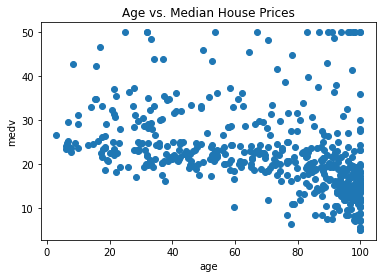

In [43]:

plt.scatter(df['age'],df['medv'])
plt.xlabel('age')
plt.ylabel('medv')
plt.title('Age vs. Median House Prices')

    

* Create a bar plot of the chas variable. What possible conclusions can you draw from this bar plot?  


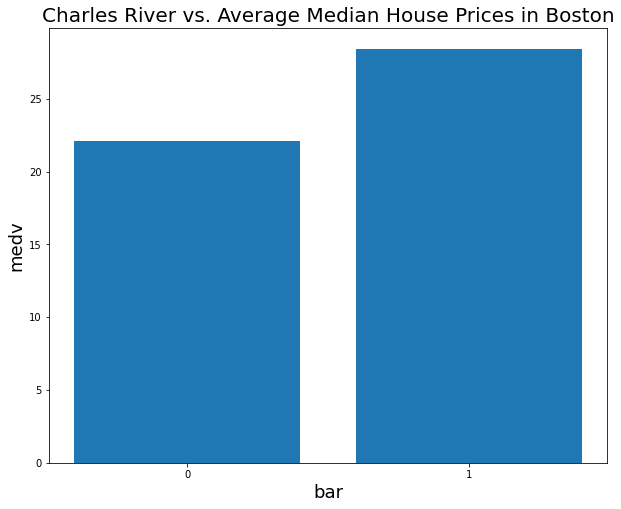

In [53]:
df_bar = df.groupby('chas')[['medv']].mean()
plt.bar(df_bar.index.astype(str),df_bar['medv'])
plt.xlabel('bar', fontsize=18)
plt.ylabel('medv', fontsize=18)
plt.title ('Charles River vs. Average Median House Prices in Boston',fontsize=20)
plt.gcf().set_size_inches(10, 8) #gcf = get the current figure


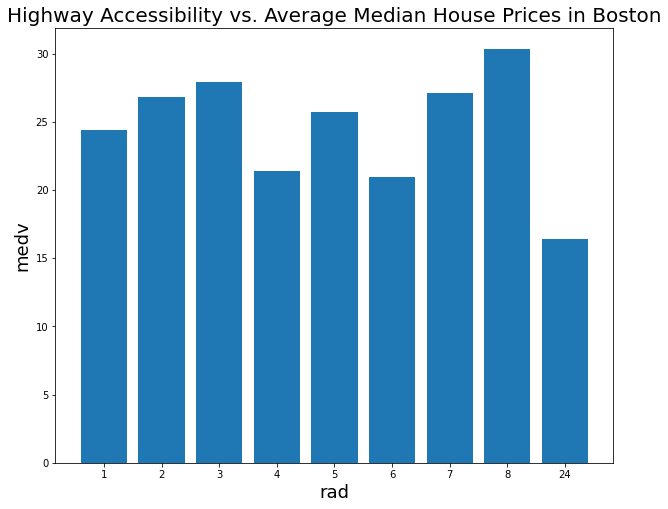

0
1
2
3
4
5
6
7
8
9
10
11


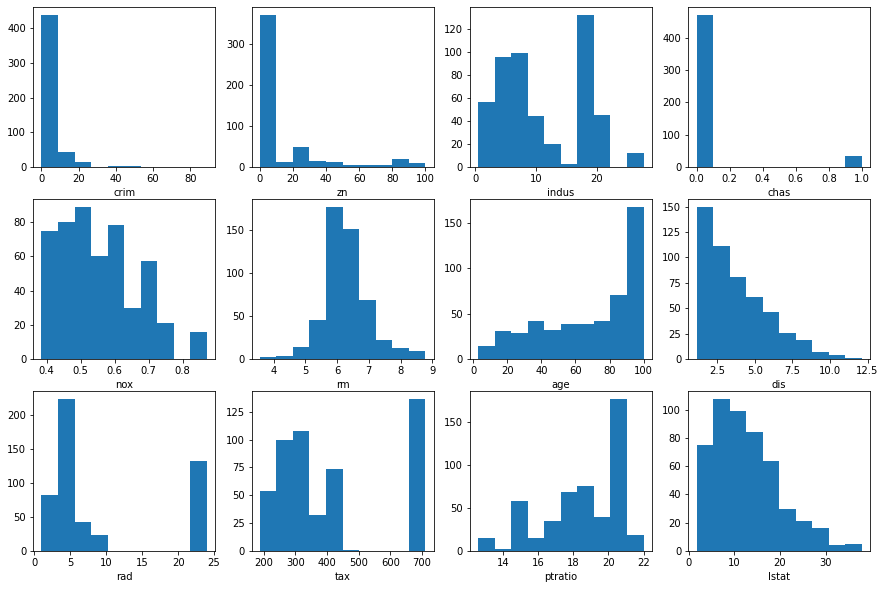

In [59]:
rows =3
columns =4
fig, axs = plt.subplots(rows, columns, figsize=(15,10)) 
for i in range(rows):
    for j in range(columns):
        print (i*columns+j)
        axs[i,j].hist(df.iloc[:,i*columns+j])
        axs[i,j].set_xlabel(df.columns.values[i*columns+j])


* Run a linear regression model using all 12 predictors.
* What are the differences between the first and the second model? 


In [60]:
#Import the statsmodels library
import statsmodels.api as sm


In [63]:
X= df.iloc[:,0:12] #select the first five variables as predictors
y= df.iloc[:,-1] #select the last variable as the response variable
X1= sm.add_constant(X) #add the intercept term
est = sm.OLS(y,X1) #OLS
est2 = est.fit()
est2.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 09 Oct 2021   Prob (F-statistic):          2.23e-133
Time:                        16:02:59   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* What other variables can affect the probability of making a field goal in the NFL?
* Run a logistic regression model with the kick_distance and roof variables as predictors.
* Does the new variable improve prediction accuracy?


SyntaxError: invalid syntax (4274144701.py, line 2)

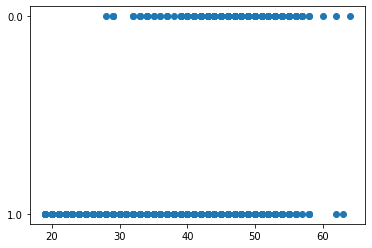

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/huagong2020/start/main/nfl2020_fg.csv')
df = df[df['success'].notnull()] #remove rows with success equal to nan
df['success']= df['success'].astype(str) #convert integer to string
plt.scatter(df['kick_distance'],df['success'])


In [86]:
y= df['success'].astype('float')
roof_dummy = pd.get_dummies(df['roof'])
X = pd.concat([df['kick_distance'],roof_dummy.iloc[:,1:]],axis=1)
X1= sm.add_constant(X)
est = sm.Logit(y,X1)
est2 = est.fit()
est2.summary()


Optimization terminated successfully.
         Current function value: 0.387525
         Iterations 7


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                 1012
Model:                          Logit   Df Residuals:                     1007
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.1749
Time:                        16:22:53   Log-Likelihood:                -392.18
converged:                       True   LL-Null:                       -475.29
Covariance Type:            nonrobust   LLR p-value:                 6.760e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7839      0.564     12.033      0.000       5.679       7.889
kick_distance    -0.1239      0.011    -10.886      0.000      -0.146      -0.102
dome              0.1135      0.400      0.284      0.776      -0.670       0.897
open              0.0014      0.573      0.002      0.998      -1.122       1.125
outdoors         -0.1369      0.279     -0.490      0.624      -0.684       0.410
=================================================================================
"""

Text(0.5, 1.0, 'Kick distance vs. the probability of making a field goal')

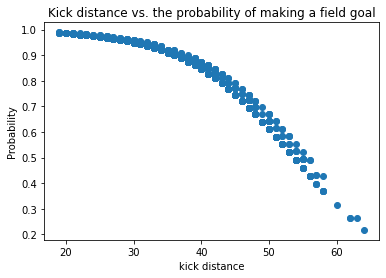

In [93]:
prob = est2.predict(X1).rename('Probability') #predict probabilities
fg_predict = pd.concat([X,prob,y],axis=1) #combine columns
plt.scatter(fg_predict['kick_distance'],fg_predict['Probability'])
plt.xlabel('kick distance')
plt.ylabel('Probability')
plt.title('Kick distance vs. the probability of making a field goal')


In [97]:
fg_predict['Probability']

0       0.489665
1       0.919520
2       0.745240
3       0.789365
4       0.860151
          ...   
1009    0.809222
1010    0.949371
1011    0.874396
1012    0.943075
1013    0.809222
Name: Probability, Length: 1012, dtype: float64

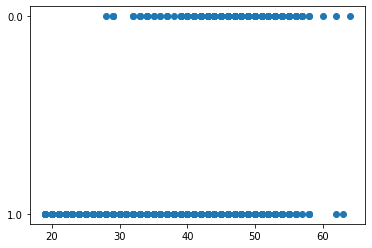

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/huagong2020/start/main/nfl2020_fg.csv')
df = df[df['success'].notnull()] #remove rows with success equal to nan
df['success']= df['success'].astype(str) #convert integer to string
plt.scatter(df['kick_distance'],df['success'])


In [99]:
fg_predict['predicted'] = fg_predict['Probability'].apply(lambda x: 1 if x>=0.5 else 0) #assign 0 and 1
fg_predict.loc[fg_predict['success'] == fg_predict['predicted'], 'correct'] =1  # correct predictions
fg_predict.loc[fg_predict['success'] != fg_predict['predicted'], 'correct'] =0  # incorrect predictions
print ('Prediction accuracy is:', (fg_predict['correct'].sum()/len(fg_predict['correct'])).round(3))


Prediction accuracy is: 0.822
